<a href="https://colab.research.google.com/github/FaaizN/Pima-Indians-Diabetes/blob/main/Pima_Indians_Diabetes_Final_Project_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Overview

According to the American Diabetes Association in 2021, 38.4 million Americans, or 11.6% of the population, had diabetes. Individuals with diabetes have an increased risk of developing heart diseases and nerve damage. It is because of this, detecting this disease early can help reduce the risk of extreme health problems.

## Objective

Build a model to predict whether or not an individual is at risk of diabetes or not using the pima_indians_diabetes dataset.

## Data Description:

* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skinfold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* Pedigree: Diabetes pedigree function - A function that scores likelihood of diabetes based on family history.
* Age: Age in years
* Class: Class variable (0: the person is not diabetic or 1: the person is diabetic)



In [ ]:
# Import the necessary libraries

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Read and manipulate data
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Split data
from sklearn.model_selection import train_test_split

# Decision Tree classifier and Ensemble
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Tune model and metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV


Read in the data

In [ ]:
pima_data = pd.read_csv("pima-indians-diabetes.csv")

In [ ]:
data = pima_data.copy()

View first 5 and last 5 rows of the dataset

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Class
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


Check to see how many rows and columns are in the dataset

In [ ]:
data.shape

(768, 9)

Check the datatypes for data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Class          768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Observations:** There are no null values in the dataset

Summary of the dataset

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
Pedigree,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


**Observations:**


1.   Data input errors could be present since Glucose, BloodPressure, SkinThickness and Insulin have minimum values of 0
2.   Average age of women in the data is 33 years
3. Outliers could be present due to difference between 3rd quartile and maximum values for variables such as SkinThickness and Insulin



Data Analysis Univariate

In [ ]:
# Create a function to show a boxplot and a histogram on the same plot

def hist_boxplot(data, feature, figsize=(12,7), kde=False, bins=None):
  # Create subplots
  f2, (ax_box2, ax_hist2) = plt.subplots(
      nrows=2,
      sharex=True,
      gridspec_kw={"height_ratios": (0.25, 0.75)},
      figsize=figsize,
  )

  # Boxplot
  sns.boxplot(
      data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
  )

  # Histogram
  if bins:
      sns.histplot(
          data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
      )
  else:
      sns.histplot(
          data=data, x=feature, kde=kde, ax=ax_hist2
      )

  # Add mean and median lines to the histogram
  ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--")
  ax_hist2.axvline(data[feature].median(), color="black", linestyle="-")

Observations on Glucose

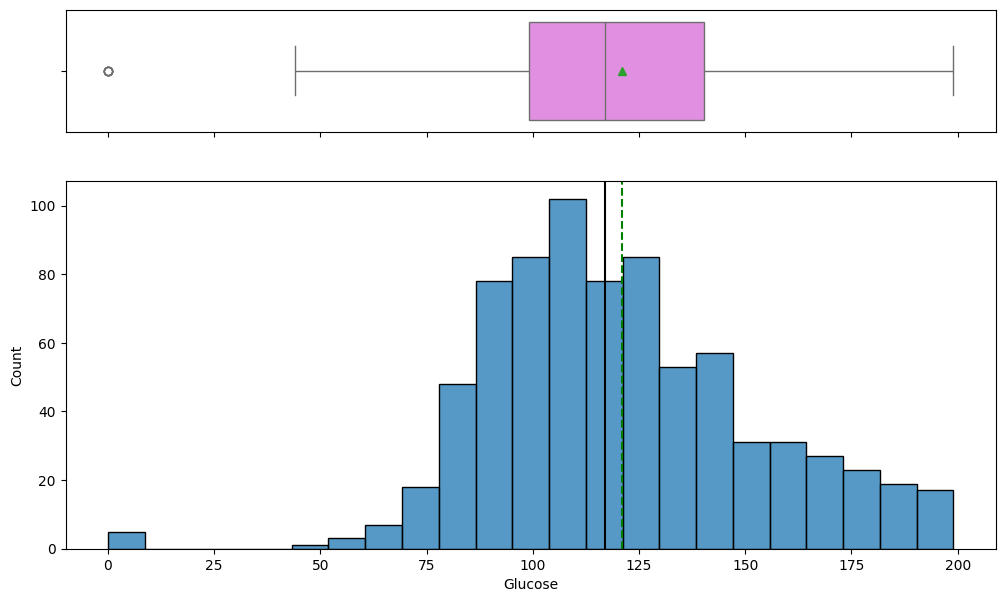

In [ ]:
hist_boxplot(data, "Glucose")

*   Bell curve for distribution of plasma glucose concentration indicates a normal distribution
*   Boxplot shows that 0 is an outlier value, however 0 is not a possible value for Glocose concentration meaning that 0 values are missing data



Observations on SkinThickness

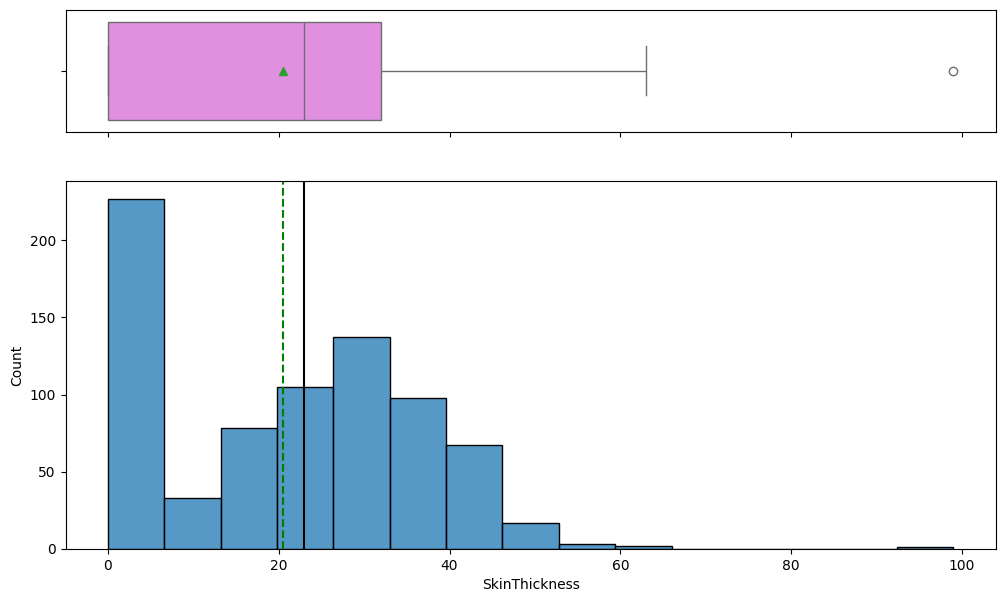

In [ ]:
hist_boxplot(data, "SkinThickness")

In [ ]:
# Show the data that is around 100
data[data['SkinThickness']>80]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Class
579,2,197,70,99,0,34.7,0.575,62,1


  * One extreme value of a skin thickness of 99
  * Similar with Glucose, there are missing values of 0 which is not possible and we should treat these values as missing data as well
  * Average skin thickness is 21 mm

Observations on Insulin

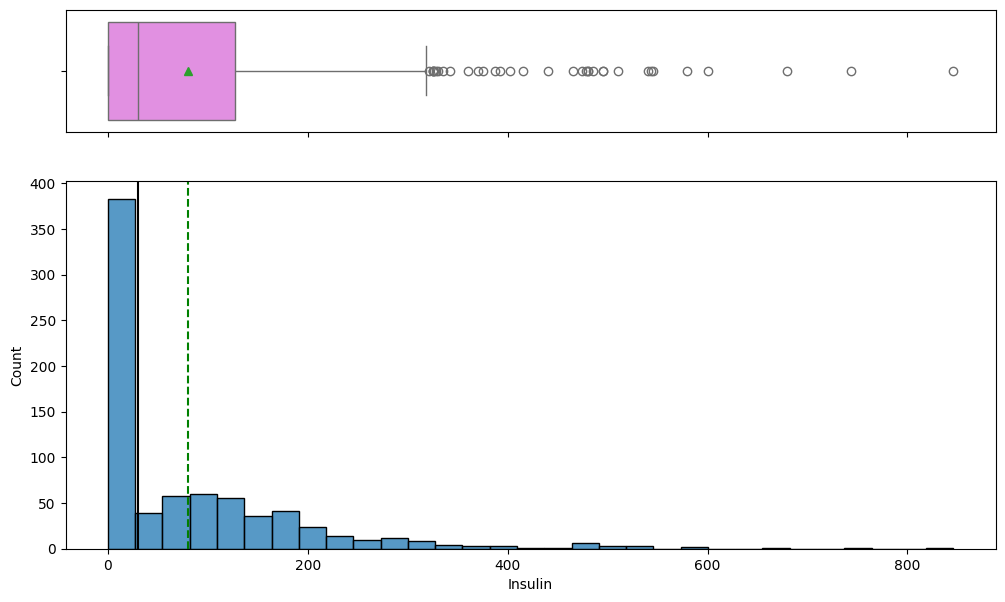

In [ ]:
hist_boxplot(data, "Insulin")

* Distribution is right skewed
* 0 value for insulin is not possible and should be treated as missing value
* Average insulin concentration is 80 mu U/ml

Observations on Age

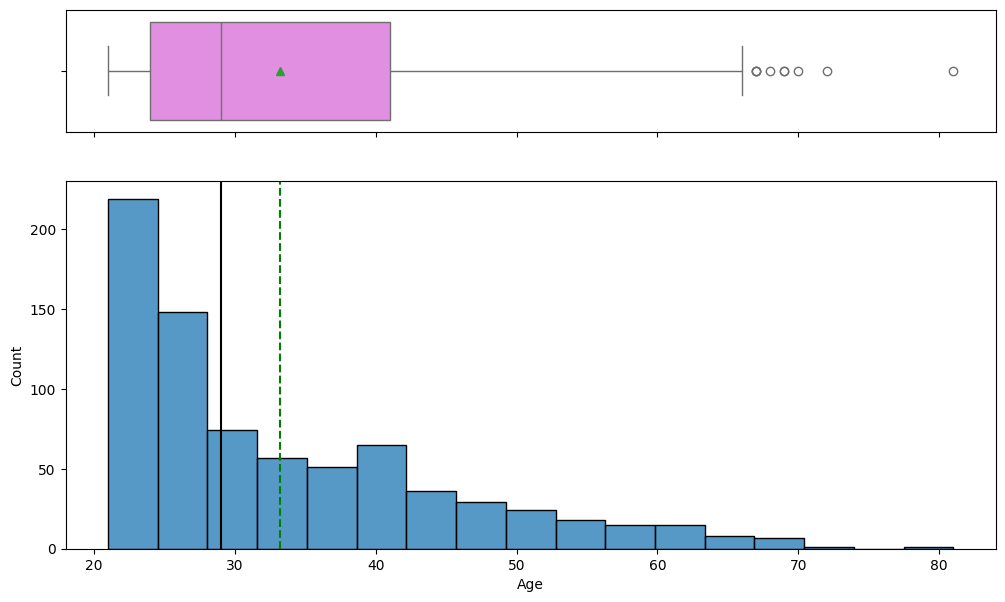

In [ ]:
hist_boxplot(data, "Age")



*   Distributio is right skewed
*   Average age is 33 years



In [ ]:
# Create a function that plots labeled barplots

def labeled_barplot(data, feature, n=None, perc=False):
    total = len(data[feature])
    count = data[feature].nunique()

    if n is None:
        figsize = (count + 1, 5)
    else:
        figsize = (n + 1, 5)

    plt.figure(figsize=figsize)
    plt.xticks(rotation=90, fontsize=15)

    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc:
            label = "{:.1f}%".format(100 * p.get_height() / total)
        else:
            label = p.get_height()

        x = p.get_x() + p.get_width() / 2
        y = p.get_height()

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )

    plt.show()

Observations on Class

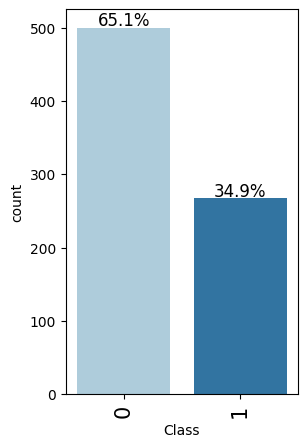

In [ ]:
labeled_barplot(data, "Class", perc=True)

Slightly imbalanced data since majority are not diabetic

Observations on Pregnancies

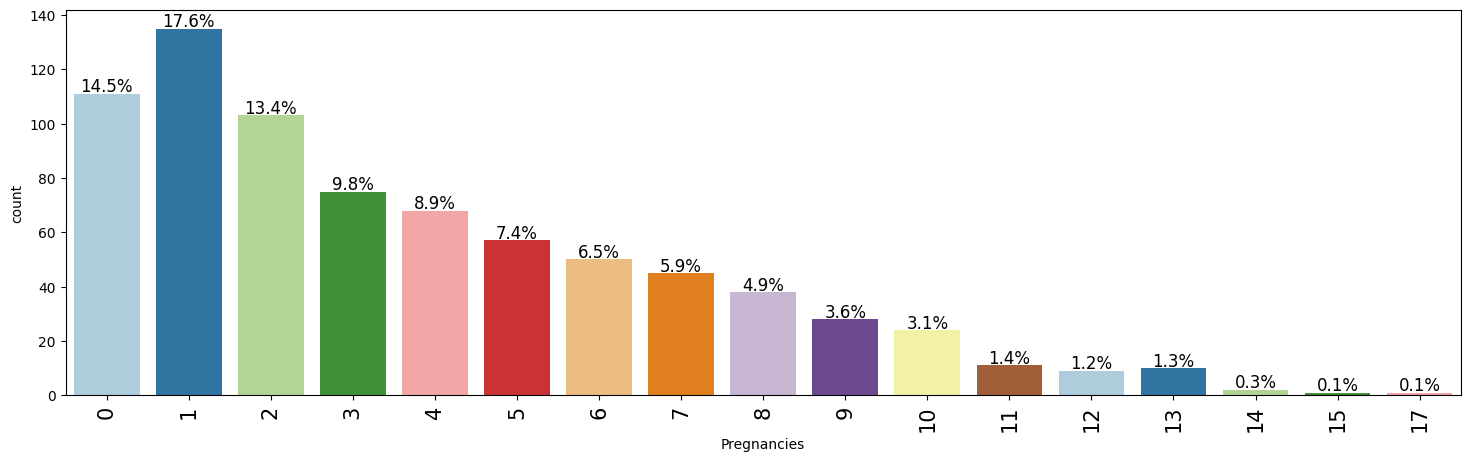

In [ ]:
labeled_barplot(data, "Pregnancies", perc=True)

Most common number of pregnancies among the data is 1


Bivariate Analysis

<Axes: >

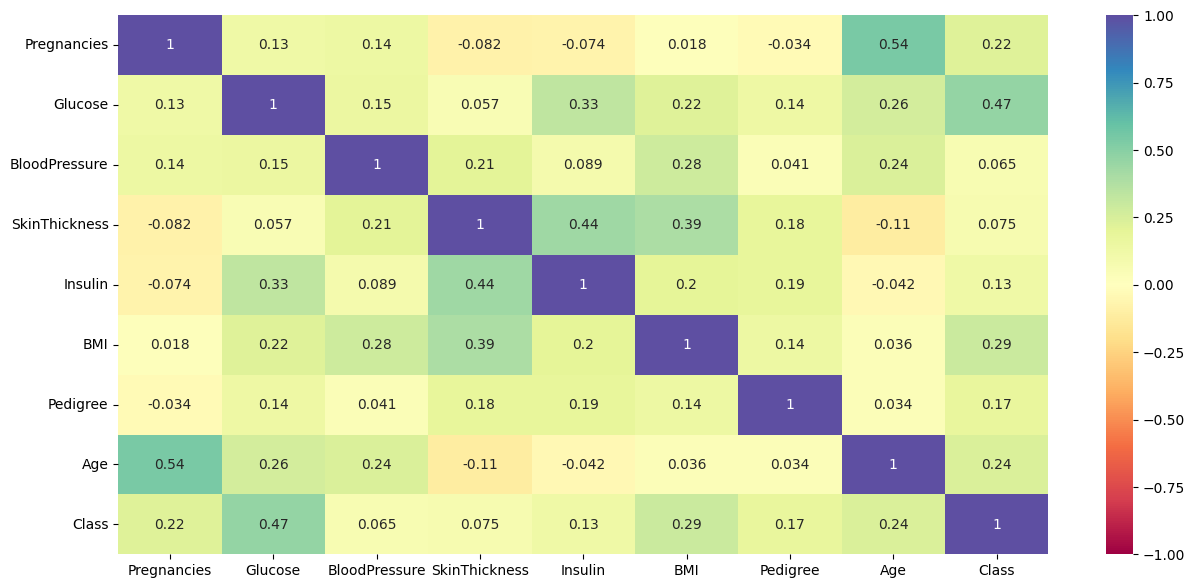

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(), annot=True, vmin = -1, vmax = 1, cmap="Spectral")



*   Positive correlation between age and number of pregnancies
*   Insulin and skin thickness also shows a decent positive correlation



In [ ]:
# Create a function for a boxplot
def boxplot(x):
  plt.figure(figsize=(10,7))
  sns.boxplot(data=data, x="Class", y=data[x], palette="PuBu")
  plt.show()

Class vs Glucose

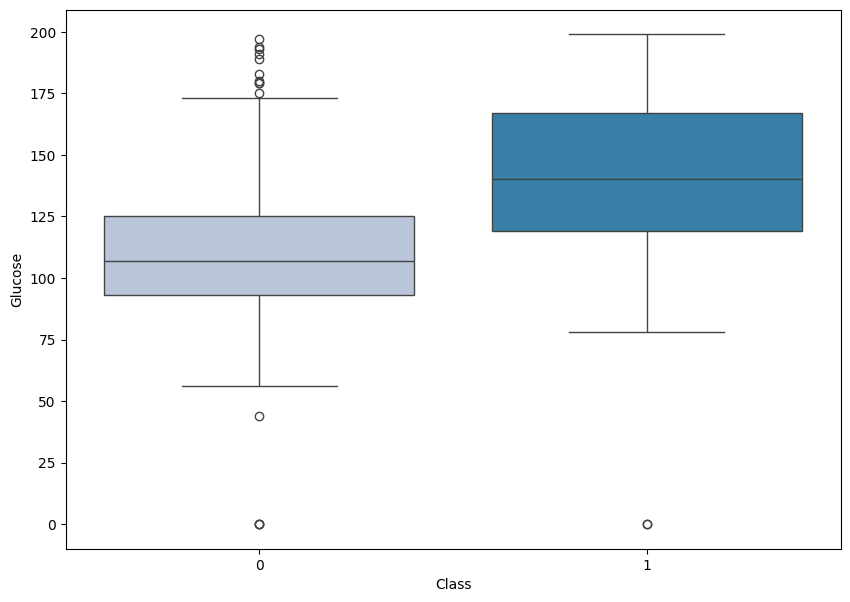

In [ ]:
boxplot('Glucose')

As expected, women with higher glucose concentrations tend to have diabetes

Missing Value Treatment

In [ ]:
data.loc[data.Glucose == 0, 'Glucose'] = data.Glucose.median()
data.loc[data.BloodPressure == 0, 'BloodPressure'] = data.BloodPressure.median()
data.loc[data.SkinThickness == 0, 'SkinThickness'] = data.SkinThickness.median()
data.loc[data.Insulin == 0, 'Insulin'] = data.Insulin.median()
data.loc[data.BMI == 0, 'BMI'] = data.BMI.median()

Split the Data

In [ ]:
X = data.drop('Class', axis=1)
y = data['Class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
print(X_train.shape, X_test.shape)

(537, 8) (231, 8)


Model Evaluation Thought Process:

Incorrect Predictions to consider:
1. Predicting a patient to have diabetes when they don't
2. Predicting a patient to not have diabetes when they do

Need to increase recall to increase our chances of minimizing false negatives. A person going undiagnosed can lead to further health complications.

Create a function to show recall scores on train and test data as well as a function to show confusion matrix

In [ ]:
def model_performance(model, predictors, target):
  # Predict model using independent variables
  pred = model.predict(predictors)

  # Compute all the scoring metrics
  acc = accuracy_score(target, pred)
  recall = recall_score(target, pred)
  precision = precision_score(target, pred)
  f1 = f1_score(target, pred)

  # Create a dataframe of the metrics
  performance_data = pd.DataFrame(
      {
          "Accuracy": acc,
          "Recall": recall,
          "Precision": precision,
          "F1": f1
      },
      index=[0],
  )

  return performance_data

In [ ]:
def conf_matrix(model, predictors, target):

  y_pred = model.predict(predictors)
  cm = confusion_matrix(target, y_pred)
  labels = np.asarray(
      [
        ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
        for item in cm.flatten()
      ]
  ).reshape(2, 2)

  plt.figure(figsize=(6,4))
  sns.heatmap(cm, annot=labels, fmt="")
  plt.ylabel("True label")
  plt.xlabel("Predicted labels")

Let's start out by creating a decision tree model

Training Performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing Performance:
    Accuracy    Recall  Precision        F1
0  0.731602  0.580247   0.626667  0.602564


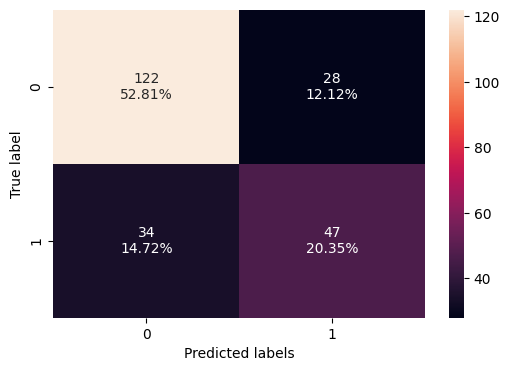

In [ ]:
# Fit the model
tree = DecisionTreeClassifier(random_state=1)
tree.fit(X_train, y_train)

# Calculate the different metrics

# training
tree_model_train_performance = model_performance(tree, X_train, y_train)
print("Training Performance:\n",tree_model_train_performance)

# testing
tree_model_test_performance = model_performance(tree, X_test, y_test)
print("Testing Performance:\n",tree_model_test_performance)

# confusion matrix
conf_matrix(tree, X_test, y_test)

The testing performance compared to the training performance is extremely subpar. The recall for the test dataset is only at 58% while the recall for the train dataset is 100% which suggests overfitting.

Since decision trees are prone to overfit, lets bagging instead

Training performance:
    Accuracy    Recall  Precision        F1
0  0.994413  0.983957        1.0  0.991914
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.744589  0.555556   0.661765  0.604027


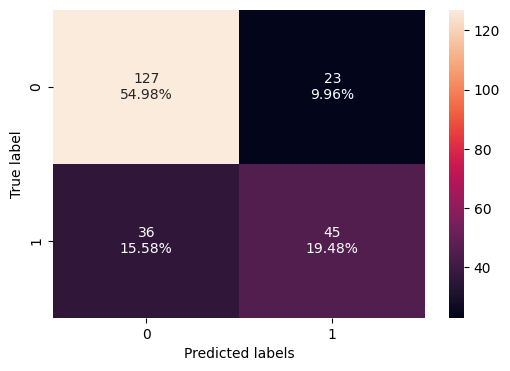

In [ ]:
#Fitting the model
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train,y_train)

#Calculating different metrics

# training
bagging_classifier_model_train_perf=model_performance(bagging,X_train,y_train)
print("Training performance:\n",bagging_classifier_model_train_perf)

# testing
bagging_classifier_model_test_perf=model_performance(bagging,X_test,y_test)
print("Testing performance:\n",bagging_classifier_model_test_perf)

#Creating confusion matrix
conf_matrix(bagging, X_test, y_test)

The bagging model is overfitting similar to the Decision Tree. Let's try tuning the models and compare them all

Decision Tree Tuning

In [ ]:
dtree_tuned = DecisionTreeClassifier(class_weight={0:0.35, 1:0.65}, random_state=1)

# Select parameters to choose from
parameters = {
    'max_depth': np.arange(2,10),
    'min_samples_leaf': [5,7,10,15],
    'max_leaf_nodes': [2,3,5,10,15],
    'min_impurity_decrease': [0.0001, 0.001, 0.01, 0.1]
}

# Score to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Grid Search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring=scorer, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set CLF to best combination of parameters
dtree_tuned = grid_obj.best_estimator_

dtree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.35, 1: 0.65}, max_depth=4,
                       max_leaf_nodes=5, min_impurity_decrease=0.0001,
                       min_samples_leaf=5, random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.759777  0.839572   0.613281  0.708804
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.692641  0.753086   0.544643  0.632124


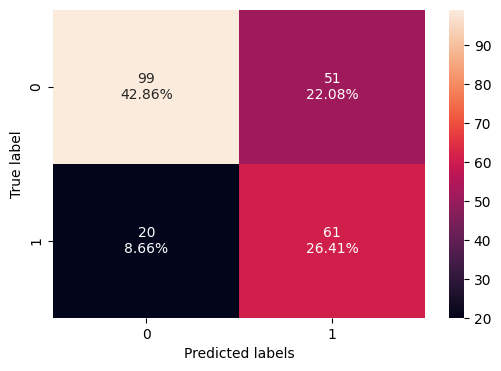

In [ ]:
dtree_tuned_model_train_perf = model_performance(dtree_tuned, X_train, y_train)
print("Training performance:\n", dtree_tuned_model_train_perf)

dtree_tuned_model_test_perf = model_performance(dtree_tuned, X_test, y_test)
print("Testing performance:\n", dtree_tuned_model_test_perf)

conf_matrix(dtree_tuned, X_test, y_test)

Bagging Tuning

In [ ]:
# Choose the type of classifier.
bagging_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.8,0.9,1],
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_tuned.fit(X_train, y_train)

bagging_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.9, max_samples=0.7, n_estimators=50,
                  random_state=1)

Now that we have all six of the models, lets see what they look like compared to each other

Training performance:
    Accuracy    Recall  Precision        F1
0   0.98324  0.957219   0.994444  0.975477
Testing performance:
    Accuracy    Recall  Precision        F1
0   0.74026  0.518519   0.666667  0.583333


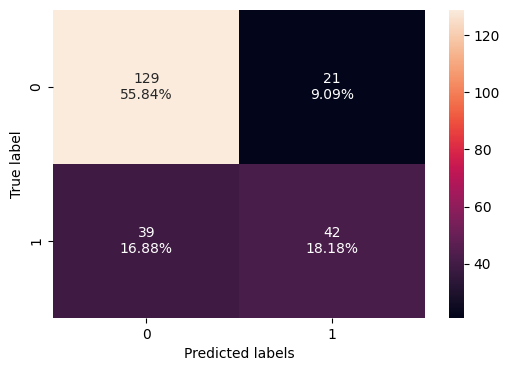

In [ ]:
# training models
bagging_tuned_model_train_perf = model_performance(bagging_tuned, X_train, y_train)
print("Training performance:\n", bagging_tuned_model_train_perf)

bagging_tuned_model_test_perf = model_performance(bagging_tuned, X_test, y_test)
print("Testing performance:\n", bagging_tuned_model_test_perf)

conf_matrix(bagging_tuned, X_test, y_test)

In [ ]:
# training performance

models_train_df = pd.concat(
    [tree_model_train_performance.T, dtree_tuned_model_train_perf.T,bagging_classifier_model_train_perf.T, bagging_tuned_model_train_perf.T],
    axis=1
)

models_train_df.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Bagging Classifier",
    "Bagging Classifier Tuned"]

print("Training performance comparison:")
models_train_df

Training performance comparison:


,Decision Tree,Decision Tree Tuned,Bagging Classifier,Bagging Classifier Tuned
Accuracy,1.0,0.759777,0.994413,0.983240
Recall,1.0,0.839572,0.983957,0.957219
Precision,1.0,0.613281,1.000000,0.994444
F1,1.0,0.708804,0.991914,0.975477


In [ ]:
# testing performance

models_test_df = pd.concat(
    [tree_model_test_performance.T, dtree_tuned_model_test_perf.T,bagging_classifier_model_test_perf.T, bagging_tuned_model_test_perf.T],
    axis=1
)

models_test_df.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Bagging Classifier",
    "Bagging Classifier Tuned"]

print("Testing performance comparison:")
models_test_df

Testing performance comparison:


,Decision Tree,Decision Tree Tuned,Bagging Classifier,Bagging Classifier Tuned
Accuracy,0.731602,0.692641,0.744589,0.740260
Recall,0.580247,0.753086,0.555556,0.518519
Precision,0.626667,0.544643,0.661765,0.666667
F1,0.602564,0.632124,0.604027,0.583333


Here we can see that a tuned decision tree is the best model for our data, due to its high test recall and generalized performance comapred to the other models.

Now that we have found the best model, lets see which features are the best at detecting diabetes

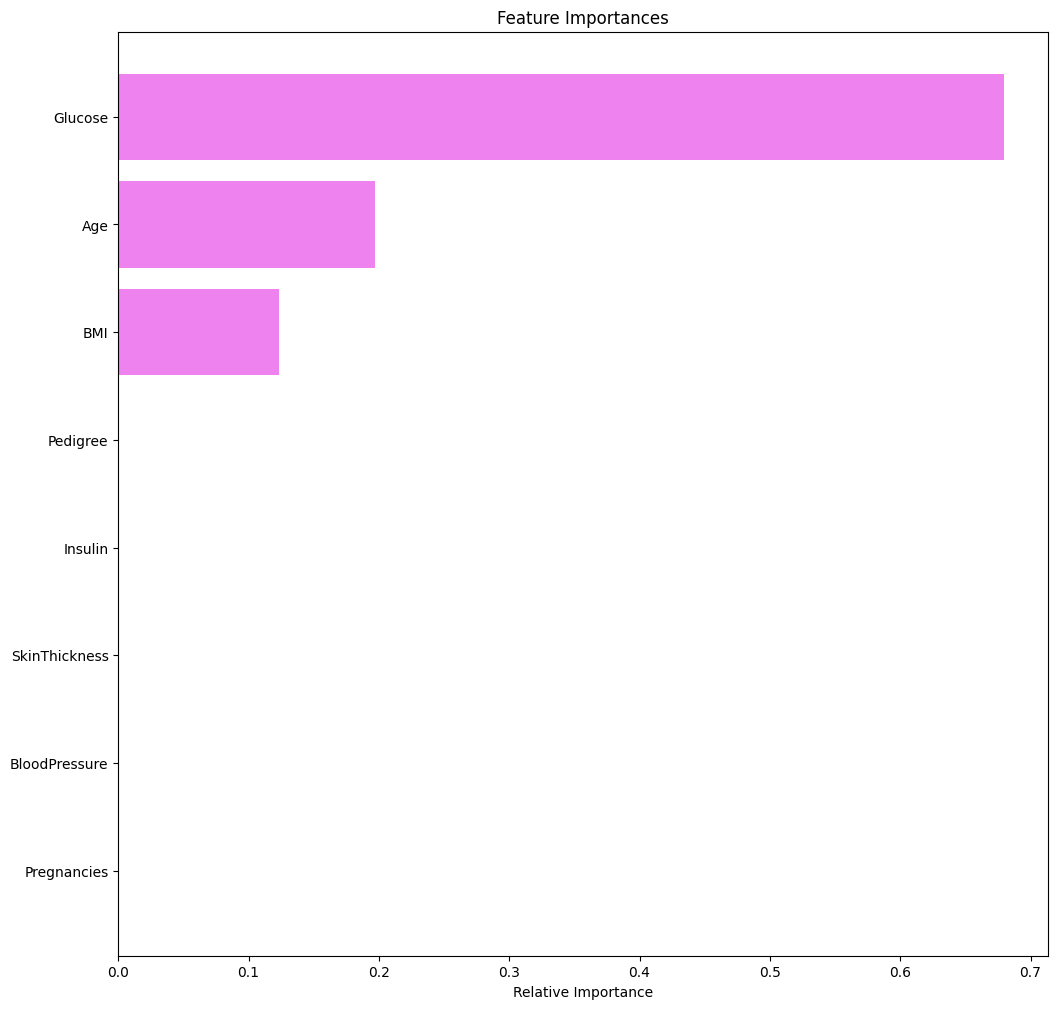

In [ ]:
feature_names = X_train.columns
importances = dtree_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


## Conclusion


*  **Decision Tree vs Bagging Classifier:** While both decision tree and bagging classifier models exhibit reasonable accuracy, the decision tree model stands out after tuning due to its superior recall performance. Given the objective of minimizing false negatives to prevent undiagnosed diabetes cases, prioritizing recall over accuracy becomes crucial in model selection. This indicates that the decision tree is better at capturing true positive cases, essential for early identification of individuals at risk of diabetes.
*   **Feature Importances**: Three variables - Glucose, Age, BMI are most important features when identifying people who are at risk of diabetes. This finding aligns with current clinical knowledge, highlighting the importance of metabolic indicators and lifestyle factors in diabetes risk assessment.
* **Early Detection and Prevention Strategies:** Early detection of diabetes through predictive modeling can significantly reduce the risk of associated health complications, such as heart diseases and nerve damage. Proactive lifestyle modifications and targeted interventions based on predictive insights can empower individuals to manage their diabetes risk effectively.
* **Demographic Considerations:**
    - Women's glucose level <=127 and age <=28 have a lower risk of diabetes.
    - Women's glucose level >100 and age >28 have a higher risk of diabetes.
    - Women's glucose level >127 and BMI <=28 have a lower risk of diabetes.  
    - Middle aged women have higher risk of diabetes,emphasizing the need for tailored preventive measures and healthcare interventions for this demographic group.
* **Future Insights:** Further research could explore additional predictive features or refine existing models to enhance predictive accuracy and reliability. Incorporation of advanced machine learning techniques may offer insights into the dynamic nature of diabetes risk factors and improve predictive models' performance.